##Question 1
Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [6]:
from pandas import DataFrame, Series

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
weather = pd.read_table('data/daily_weather.tsv')

In [19]:
season_mapping = {'Spring': 'Winter', 'Winter': 'Fall', 'Fall': 'Summer', 'Summer': 'Spring'}

In [20]:
weather['season_desc'] = weather['season_desc'].map(season_mapping)

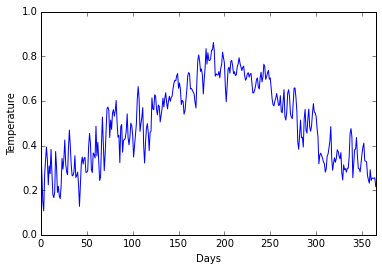

In [31]:
plt.plot(weather['temp'], 'b-')
plt.axis(xmax=365)
plt.axis(ymin=0, ymax=1)
plt.xlabel('Days')
plt.ylabel('Temperature')

## Question 2
Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

## Question 3
Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

## Question 4
How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.